# Density Functional Theory: Grid
## I. Theoretical Overview
This tutorial will discuss the basics of DFT and discuss the grid used to evaluate DFT quantities.
As with HF, DFT aims to solve the generalized eigenvalue problem:

$$\sum_{\nu} F_{\mu\nu}C_{\nu i} = \epsilon_i\sum_{\nu}S_{\mu\nu}C_{\nu i}$$
$${\bf FC} = {\bf SC\epsilon},$$

Where with HF the Fock matrix is constructed as:

$$F^{HF}_{\mu\nu} = H_{\mu\nu} + 2J[D]_{\mu\nu} - K[D]_{\mu\nu}$$

$$D_{\mu\nu} = C_{\mu i} C_{\nu i}$$

With DFT we generalize this construction slightly to:
$$F^{DFT}_{\mu\nu} = H_{\mu\nu} + 2J[D]_{\mu\nu} - \zeta K[D]_{\mu\nu} + V^{\rm{xc}}_{\mu\nu}$$

$\zeta$ is an adjustable parameter where we can very the amount of exact (HF) exchange and $V$ is the DFT potenital which typically attempts to add dynamical correlation in the self-consistent field methodolgy.



## 2. Examining the Grid
We will discuss the evaluation and manipulation of the grid.

In [1]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
# Set computatation options and molecule, any single atom will do.

mol = psi4.geometry("He")
psi4.set_options({'BASIS':                'CC-PVDZ',
                  'DFT_SPHERICAL_POINTS': 110,
                  'DFT_RADIAL_POINTS':    20})

In [3]:
basis = psi4.core.BasisSet.build(mol, "ORBITAL", "CC-PVDZ")
sup = psi4.driver.dft_funcs.build_superfunctional("PBE", True)[0]
Vpot = psi4.core.VBase.build(basis, sup, "RV")
Vpot.initialize()

In [4]:
def get_grid_xyzw(potential):
    x_list = []
    y_list = []
    z_list = []
    w_list = []
    
    # Loop over every block in the potenital
    for b in range(Vpot.nblocks()):
        
        # Obtain the block
        block = Vpot.get_block(b)
        
        # Obtain the x, y, and z coordinates along with the weight
        x_list.append(block.x())
        y_list.append(block.y())
        z_list.append(block.z())
        w_list.append(block.w())
        
    x = np.hstack(x_list)
    y = np.hstack(y_list)
    z = np.hstack(z_list)
    w = np.hstack(w_list)
    
    return (x, y, z, w)


In [5]:
x, y, z, w = get_grid_xyzw(Vpot)
R = np.sqrt(x **2 + y ** 2 + z **2)

<IPython.core.display.Javascript object>


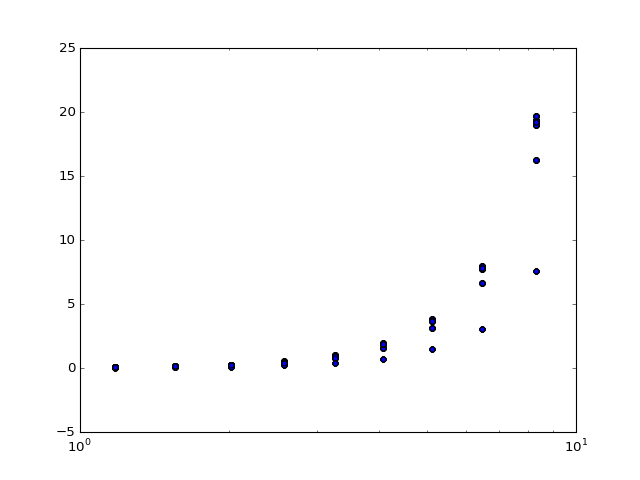

In [6]:
fig, ax = plt.subplots()
ax.scatter(R, w)
ax.set_xscale('log')

<IPython.core.display.Javascript object>


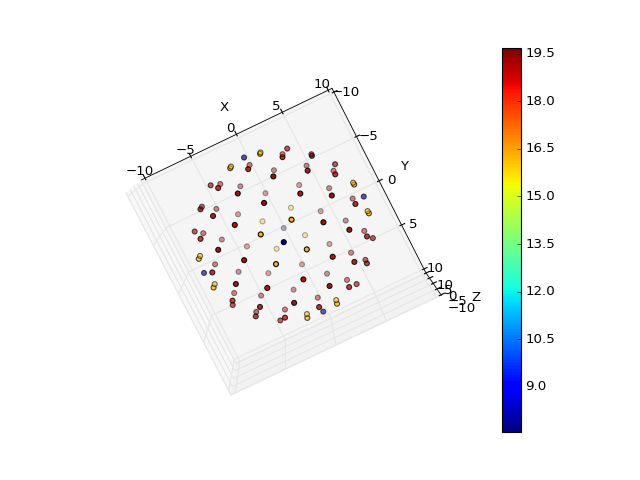

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
mask = R > 8
p = ax.scatter(x[mask], y[mask], z[mask], c=w[mask], marker='o')
plt.colorbar(p)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

<IPython.core.display.Javascript object>


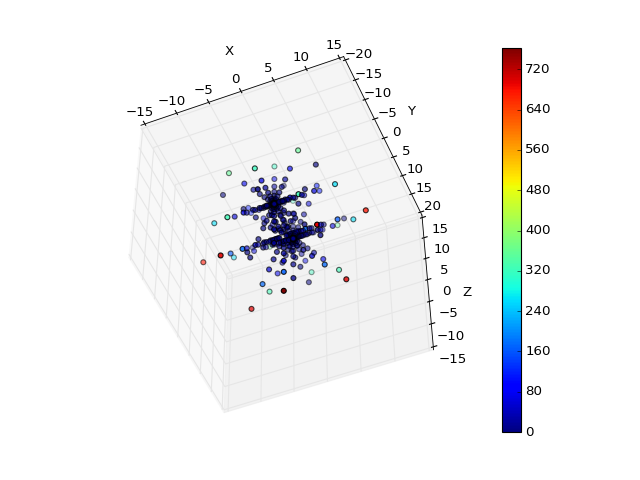

In [23]:
mol = psi4.geometry("""
 O
 H 1 3.1
 H 1 3.1 2 104
""")
mol.update_geometry()
psi4.set_options({'BASIS': '              CC-PVDZ',
                  'DFT_SPHERICAL_POINTS': 14,
                  'DFT_RADIAL_POINTS':    12})
basis = psi4.core.BasisSet.build(mol, "ORBITAL", "CC-PVDZ")
sup = psi4.driver.dft_funcs.build_superfunctional("PBE", True)[0]
Vpot = psi4.core.VBase.build(basis, sup, "RV")
Vpot.initialize()
x, y, z, w = get_grid_xyzw(Vpot)
R = np.sqrt(x **2 + y ** 2 + z **2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
mask = R > 1
p = ax.scatter(x[mask], y[mask], z[mask], c=w[mask], marker='o')
plt.colorbar(p)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Refs:
- Koch, W. and Holthausen, M.C., **2001**, A Chemist’s Guide to Density Functional Theory, 2nd, Wiley-VCH, Weinheim.
- Kohn, W. and Sham, L. *J, Phys. Rev.*, **1965**, *140*, A1133- A1138
- Becke, A.D., *J. Chem. Phys.*, **1988**, *88*, 2547
- Treutler, O. and Ahlrichs, R., *J. Chem. Phys.*, **1995**, *102*, 346
 Gill, P.M.W., Johnson, B.G., and Pople, J.A., *Chem. Phys. Lett.*, **1993,209 (5), pp. 506, 16 July 1993.